In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP2 - 1er cuatri 2021
En esta carpeta de Jupyter vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Métodos
Los métodos evaluados en este notebook son los siguientes:

- **VMC** : vecino mas cercano
- **AGM** : arbol generador minimo
- **I** : incersion

# Experimentos
Leemos el dataframe con todos los resultados.

In [3]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
0,berlin52,52,AGM-TS1,5.75046,10402.0,50,50,50,5
1,berlin52,52,AGM-TS1,5.45058,10402.0,100,50,50,5
2,berlin52,52,AGM-TS1,5.54075,10402.0,200,50,50,5
3,berlin52,52,AGM-TS1,15.77830,9896.0,50,50,50,30
4,berlin52,52,AGM-TS1,15.72100,9896.0,100,50,50,30
...,...,...,...,...,...,...,...,...,...
862,berlin52,52,I-TS2,567.20800,8370.0,100,1000,300,50
863,berlin52,52,I-TS2,572.98400,8497.0,200,1000,300,50
864,berlin52,52,I-TS2,1016.90000,7866.0,50,1000,300,100
865,berlin52,52,I-TS2,1023.09000,7887.0,100,1000,300,100


In [4]:
df_resultados["metodo"].unique()

array(['AGM-TS1', 'AGM-TS2', 'VMC-TS1', 'VMC-TS2', 'I-TS1', 'I-TS2',
       'AGM', 'VMC', 'I'], dtype=object)

In [7]:
cols

Index(['dataset', 'n', 'metodo', 'tiempo', 'costo', 'largolista', 'max_iter',
       'rang_iter', 'percentage'],
      dtype='object')

# Buscar parametros optimos tabu

## GAP
Creamos un dataframe para analizar el GAP relativo de cada metodo 


Gap relativo = (costo-optimo) /optimo

In [6]:
## gap = costo / optimo * 100 - 100 = gap
def gap(costo, optimo):
    return int(costo / optimo * 100 - 100)

dic_optimos = {'berlin52': 7542}

df_gap = df_resultados[(df_resultados["dataset"] == "berlin52") | (df_resultados["dataset"] == "ch150")].copy();
#df_gap.drop(df_gap.columns[[5,6,7,8]], axis=1, inplace=True)
list_gap = []
list_optimo = []
for index, row in df_gap.iterrows():
    costo = int(row['costo'])
    optimo = dic_optimos[row['dataset']]
    value_gap = (costo - optimo) / optimo 
    list_optimo.append(dic_optimos[row['dataset']])
    list_gap.append(value_gap)


df_gap['optimo'] = list_optimo
df_gap['gap'] = list_gap

In [24]:
df_gap["rang_iter"].unique

<bound method Series.unique of 0       50
1       50
2       50
3       50
4       50
      ... 
862    300
863    300
864    300
865    300
866    300
Name: rang_iter, Length: 867, dtype: int64>

In [7]:
df_gap.sort_values(by=['gap'],ascending=True).head(5)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
698,berlin52,52,AGM-TS2,999.533,7702.0,200,1000,50,100,7542,0.021215
710,berlin52,52,AGM-TS2,1051.710,7747.0,200,1000,100,100,7542,0.027181
769,berlin52,52,VMC-TS2,976.039,7767.0,100,1000,50,100,7542,0.029833
721,berlin52,52,AGM-TS2,990.400,7772.0,100,1000,300,100,7542,0.030496
792,berlin52,52,VMC-TS2,967.889,7774.0,50,1000,300,100,7542,0.030761


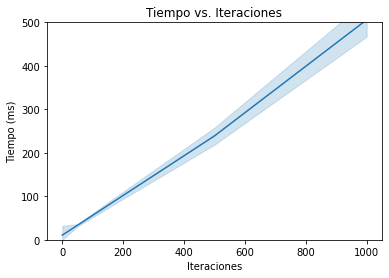

In [46]:
df = df_gap
sns.lineplot(data = df, x = "max_iter",y = "tiempo")
plt.title("Tiempo vs. Iteraciones")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo (ms)")
plt.ylim(0,500)
plt.savefig("graficos/tiempo-vs-iter.svg")

plt.show()

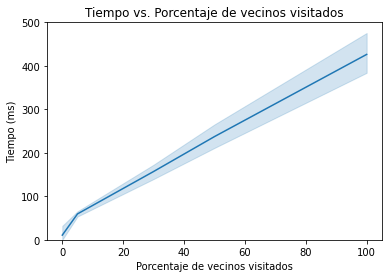

In [47]:
df = df_gap
sns.lineplot(data = df, x = "percentage",y = "tiempo")
plt.title("Tiempo vs. Porcentaje de vecinos visitados")
plt.xlabel("Porcentaje de vecinos visitados")
plt.ylabel("Tiempo (ms)")
plt.ylim(0,500)
plt.savefig("graficos/tiempo-vs-porcentage.svg")

plt.show()

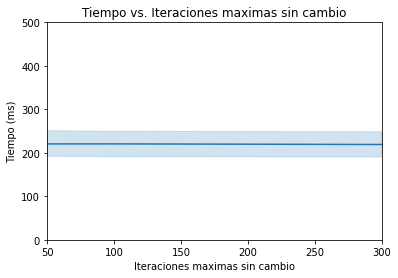

In [48]:
df = df_gap
sns.lineplot(data = df, x = "rang_iter",y = "tiempo")
plt.title("Tiempo vs. Iteraciones maximas sin cambio")
plt.xlabel("Iteraciones maximas sin cambio")
plt.ylabel("Tiempo (ms)")
plt.xlim(50,300)
plt.ylim(0,500)
plt.savefig("graficos/tiempo-vs-rangiter.svg")

plt.show()

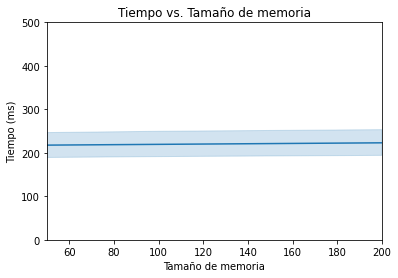

In [49]:
df = df_gap
sns.lineplot(data = df, x = "largolista",y = "tiempo")
plt.title("Tiempo vs. Tamaño de memoria")
plt.xlabel("Tamaño de memoria")
plt.ylabel("Tiempo (ms)")
plt.xlim(50,200)
plt.ylim(0,500)
plt.savefig("graficos/tiempo-vs-largolista.svg")

plt.show()

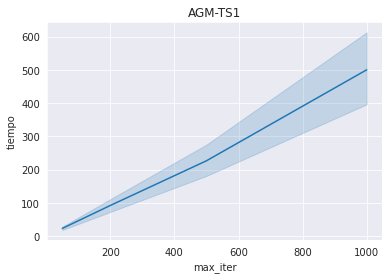

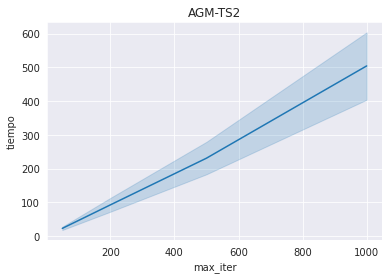

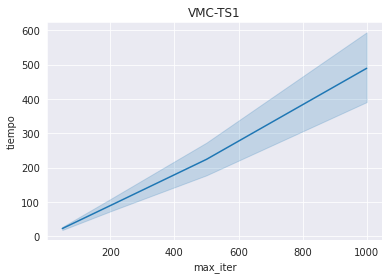

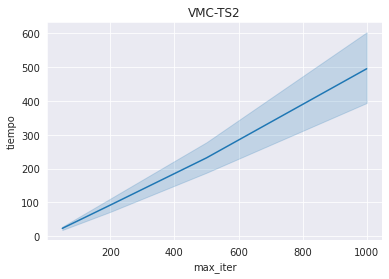

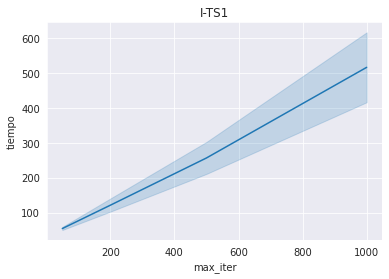

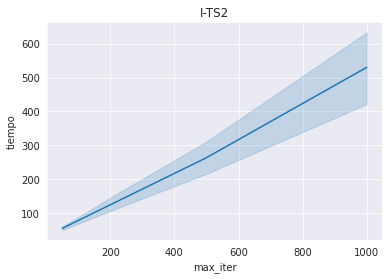

In [69]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
for m in Metodos :
        df = df_gap[df_gap["metodo"] == m]
        sns.lineplot(data = df, x = "max_iter",y = "tiempo")
        plt.title(m)
        plt.show()

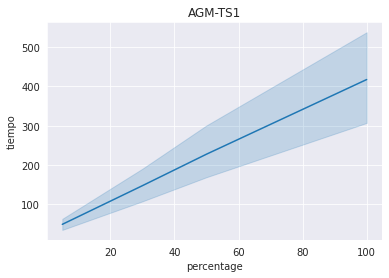

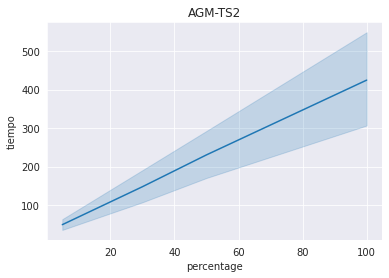

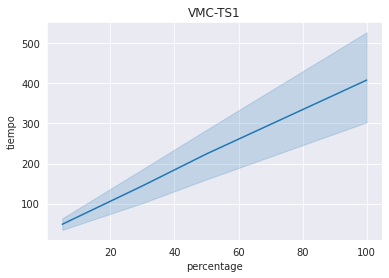

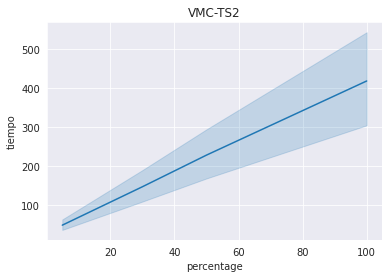

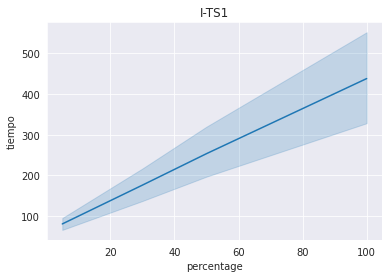

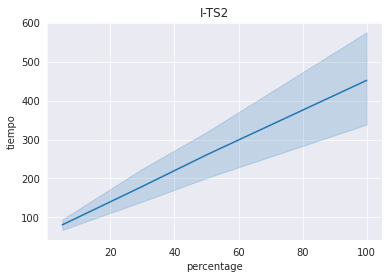

In [70]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
for m in Metodos :
        df = df_gap[df_gap["metodo"] == m]
        sns.lineplot(data = df, x = "percentage",y = "tiempo")
        plt.title(m)
        plt.show()

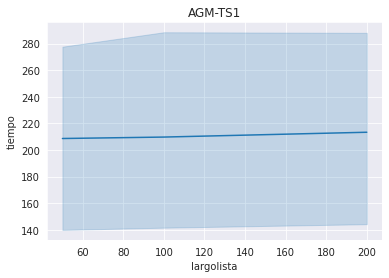

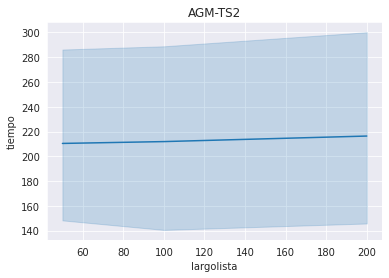

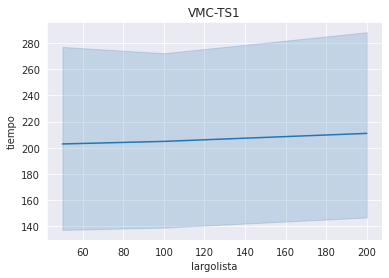

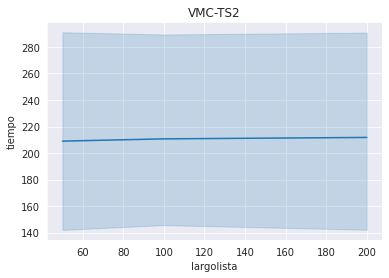

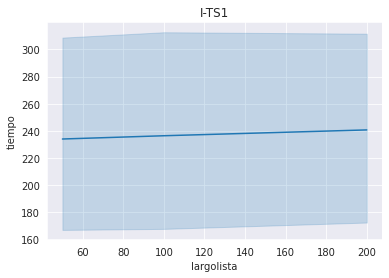

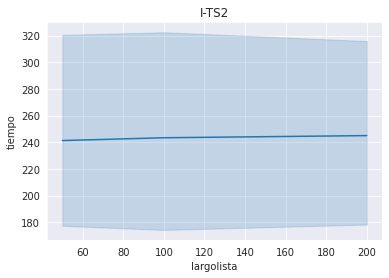

In [72]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
for m in Metodos :
        df = df_gap[df_gap["metodo"] == m]
        sns.lineplot(data = df, x = "largolista",y = "tiempo")
        plt.title(m)
        plt.show()

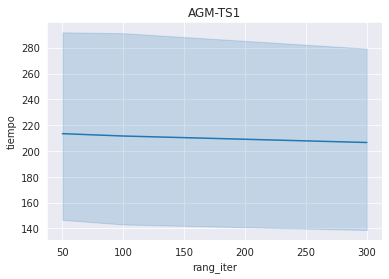

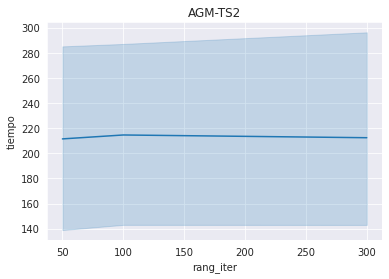

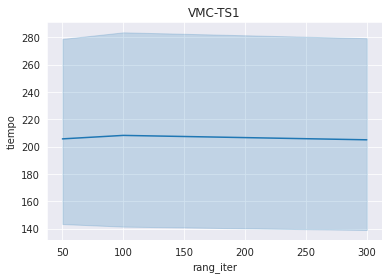

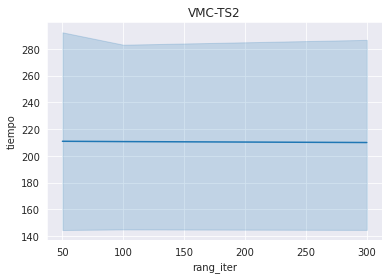

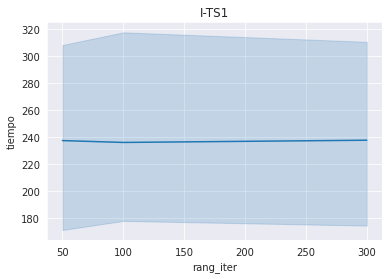

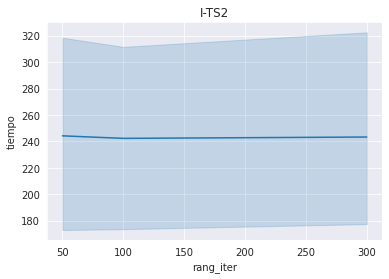

In [73]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
for m in Metodos :
        df = df_gap[df_gap["metodo"] == m]
        sns.lineplot(data = df, x = "rang_iter",y = "tiempo")
        plt.title(m)
        plt.show()

In [50]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
for m in Metodos :
    df = df = df_gap[df_gap["metodo"] == m]
    optimo = df.sort_values(by=['gap'],ascending=True).head(1).copy()
    print(f"{m} OPTIMO:")
    display(optimo)
    print("----------------------")

AGM-TS1 OPTIMO:


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
662,berlin52,52,AGM-TS1,1052.08,7796.0,200,1000,50,100,7542,0.033678


----------------------
AGM-TS2 OPTIMO:


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
698,berlin52,52,AGM-TS2,999.533,7702.0,200,1000,50,100,7542,0.021215


----------------------
VMC-TS1 OPTIMO:


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
758,berlin52,52,VMC-TS1,1007.34,7778.0,200,1000,300,100,7542,0.031291


----------------------
VMC-TS2 OPTIMO:


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
769,berlin52,52,VMC-TS2,976.039,7767.0,100,1000,50,100,7542,0.029833


----------------------
I-TS1 OPTIMO:


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
828,berlin52,52,I-TS1,976.292,7783.0,50,1000,300,100,7542,0.031954


----------------------
I-TS2 OPTIMO:


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
866,berlin52,52,I-TS2,1022.08,7811.0,200,1000,300,100,7542,0.035667


----------------------


In [67]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
dic_gap = {}
for m in Metodos :
    df = df = df_gap[df_gap["metodo"] == m]
    fila = df[( df["percentage"]== 100 )].sort_values(by=['gap'],ascending=True).head(1)
    gap100 = fila["gap"].to_list()[0]
    largo = fila["largolista"].to_list()[0]
    p = fila["percentage"].to_list()[0]
    itera = fila["max_iter"].to_list()[0]
    r =  fila["rang_iter"].to_list()[0]
    
    gap50 = df[( df["percentage"]== 50 )].sort_values(by=['gap'],ascending=True).head(1)["gap"].to_list()[0]  
    gapdif = gap50 -gap100
    dic_gap[m] = gapdif
    
    print(f"{m} & {largo} & {p} & {itera} & {r} & {gap100}" )
    
dic_gap

AGM-TS1 & 200 & 100 & 1000 & 50 & 0.03367806947759215
AGM-TS2 & 200 & 100 & 1000 & 50 & 0.021214531954388757
VMC-TS1 & 200 & 100 & 1000 & 300 & 0.031291434632723415
VMC-TS2 & 100 & 100 & 1000 & 50 & 0.029832935560859187
I-TS1 & 50 & 100 & 1000 & 300 & 0.031954388756298066
I-TS2 & 200 & 100 & 1000 & 300 & 0.0356669318483161


{'AGM-TS1': 0.05900291699814372,
 'AGM-TS2': 0.06589763988332008,
 'VMC-TS1': 0.053301511535401754,
 'VMC-TS2': 0.051047467515247955,
 'I-TS1': 0.06390877751259613,
 'I-TS2': 0.06271546009016175}

Diferencia de cada metodo en ver 100% vecinos o 50%

In [63]:
df[( df["percentage"]== 100 )].sort_values(by=['gap'],ascending=True).head(1)["largolista"].to_list()[0]    


200

In [51]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
dic_gap = {}
for m in Metodos :
    df = df = df_gap[df_gap["metodo"] == m]
    fila = df[( df["percentage"]== 100 )].sort_values(by=['gap'],ascending=True).head(1)
    gap100 = fila["gap"].to_list()[0]    
    gap50 = df[( df["percentage"]== 50 )].sort_values(by=['gap'],ascending=True).head(1)["gap"].to_list()[0]  
    gapdif = gap50 -gap100
    dic_gap[m] = gapdif
    
    print(f"{m}& & & & gap1000)
    
dic_gap

{'AGM-TS1': 0.05900291699814372,
 'AGM-TS2': 0.06589763988332008,
 'VMC-TS1': 0.053301511535401754,
 'VMC-TS2': 0.051047467515247955,
 'I-TS1': 0.06390877751259613,
 'I-TS2': 0.06271546009016175}

EN los siguientes metodos ver 50% de vecinos tiene una diferencia en gap menor a 0.06 con respecto al ver el 100%

In [53]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
dic_iter = {}
for m in Metodos :
    if dic_gap[m] < 0.06 :
        df = df = df_gap[df_gap["metodo"] == m]
        
        display(df[( df["percentage"]== 50 )].sort_values(by=['gap'],ascending=True).head(1))  
        

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
80,berlin52,52,AGM-TS1,252.205,8241.0,200,500,50,50,7542,0.092681


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
295,berlin52,52,VMC-TS1,241.857,8180.0,100,500,50,50,7542,0.084593


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
427,berlin52,52,VMC-TS2,248.129,8152.0,100,500,300,50,7542,0.08088


In [68]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
dic_iter = {}
for m in Metodos :
    if dic_gap[m] >=0.06 :
        df = df = df_gap[df_gap["metodo"] == m]
        
        display(df[( df["max_iter"]== 500 )].sort_values(by=['gap'],ascending=True).head(1))  
        

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
214,berlin52,52,AGM-TS2,458.493,7831.0,100,500,300,100,7542,0.038319


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
526,berlin52,52,I-TS1,472.808,7841.0,100,500,100,100,7542,0.039645


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
621,berlin52,52,I-TS2,487.416,7897.0,50,500,50,100,7542,0.04707


Diferencia entre usar 500 o 1000 iteraciones

In [54]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
dic_iter = {}
for m in Metodos :
    
    df = df = df_gap[df_gap["metodo"] == m]
    
    if dic_gap[m] < 0.06 :
        gap1000 = df[( df["percentage"]== 50 ) & ( df["max_iter"]== 1000 )  ].sort_values(by=['gap'],ascending=True).head(1)["gap"].to_list()[0]  
        gap500 = df[( df["percentage"]== 50 ) & ( df["max_iter"]== 500 )  ].sort_values(by=['gap'],ascending=True).head(1)["gap"].to_list()[0]  
        gapdif = gap500 - gap1000
    else :
        gap1000 = df[( df["max_iter"]== 1000 )  ].sort_values(by=['gap'],ascending=True).head(1)["gap"].to_list()[0]  
        gap500 = df[( df["max_iter"]== 500 )  ].sort_values(by=['gap'],ascending=True).head(1)["gap"].to_list()[0]  
        gapdif = gap500 -gap1000
        
    dic_iter[m] = gapdif
dic_iter    

{'AGM-TS1': -0.014850172368072137,
 'AGM-TS2': 0.017104216388225936,
 'VMC-TS1': -0.015645717316361704,
 'VMC-TS2': -0.004508088040307612,
 'I-TS1': 0.007690267833465922,
 'I-TS2': 0.01140281092548396}

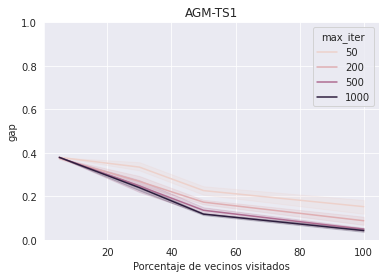

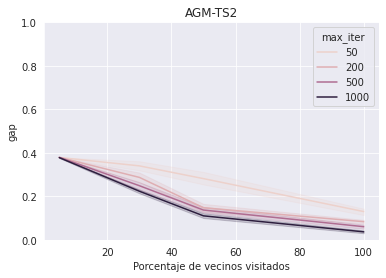

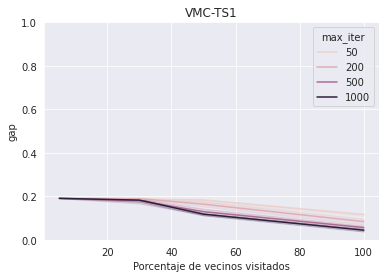

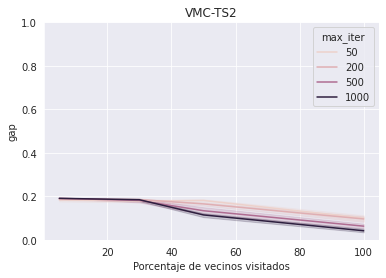

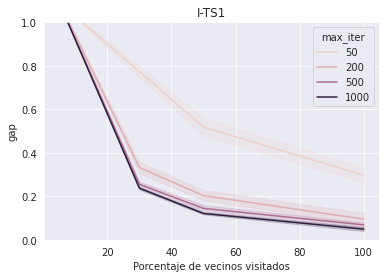

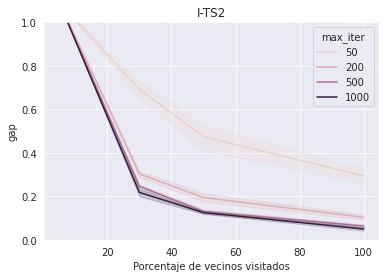

In [71]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
for m in Metodos :
        df = df_gap[df_gap["metodo"] == m]
        sns.set_style("darkgrid")
        sns.lineplot(data = df, x = "percentage",y = "gap",hue= "max_iter")
        plt.title(m)
        plt.ylim((0.0,1.0))
        plt.xlabel("Porcentaje de vecinos visitados")
        plt.savefig(f"graficos/tabu-porcentaje-{m}.svg")
        plt.show()

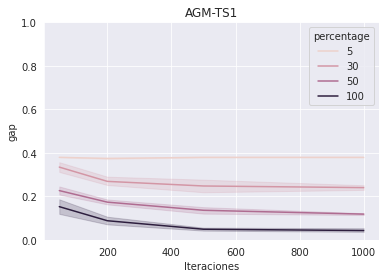

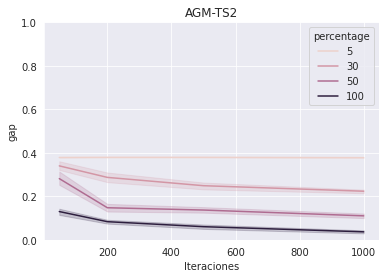

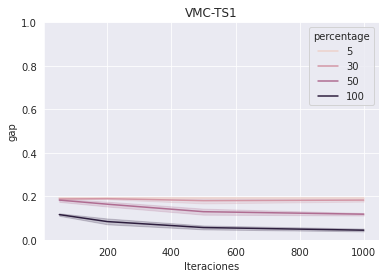

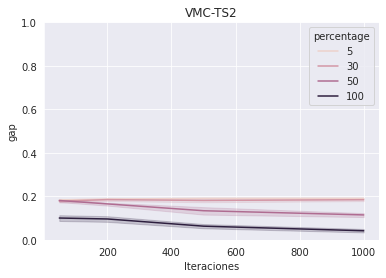

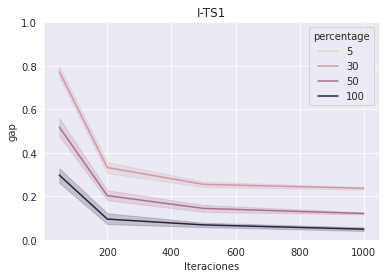

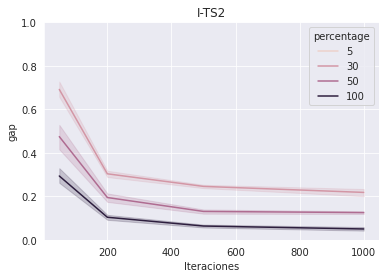

In [72]:
Metodos = ["AGM-TS1","AGM-TS2","VMC-TS1","VMC-TS2","I-TS1","I-TS2"]
for m in Metodos :
        df = df_gap[df_gap["metodo"] == m]
        sns.lineplot(data = df, x = "max_iter",y = "gap",hue= "percentage")
        plt.title(m)
        plt.xlabel("Iteraciones")
        plt.ylim((0.0,1.0))

        plt.savefig(f"graficos/tabu-iteraciones-{m}.svg")
        plt.show()